**Rental Price Gouging in Los Angeles County**
This data was scraped from zillow and Airbnb listings since the recent fires and lists instances of rental price gouging in Los Angeles County. 

In [9]:
import os

# List all files in the current directory to make sure I've got everything in the right place.
print(os.listdir())


['.ipynb_checkpoints', 'LA_addresses - Rental Price Gouging in LA.csv', 'week2assignment.ipynb']


2       Timestamp           Address - House number, street, and apartment number  City         State  ZIP      Rental price (per month) BEFORE the increase (put N/A if FMR)  Rental price (per month) AFTER the increase  Date of the price increase  Listing site                        Link to rental listing                                                                                                                                                                         Rental listing agent (if known)  Property owner (if known)  Additional info. Please include any additional information you have about this property, including the price history, ownership information, occupancy status, and anything else that you think helps to establish that this is an instance of price gouging  Please include screengrabs of the listing page, the price history, and anything else that you think helps to establish that this is an instance of price gouging.\n\nPlease include the browser's address bar with t

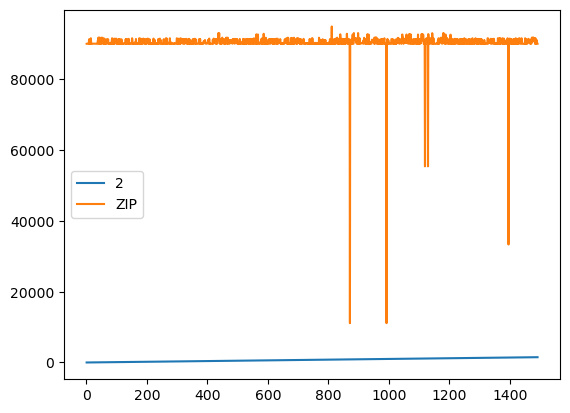

In [11]:
# Renamed the sheet to just be LA_addresses for efficiency sake. 

import pandas as pd

# Import pandas and check out the first few rows of data
df = pd.read_csv("LA_addresses.csv")  

# Show the first few rows
df.head()


In [12]:
df.shape


(1492, 21)

In [13]:
df.info


<bound method DataFrame.info of            2           Timestamp  \
0        NaN                 NaN   
1        3.0  1/11/2025 22:32:37   
2        4.0  1/11/2025 23:12:03   
3        5.0  1/11/2025 23:18:45   
4        6.0  1/11/2025 23:23:45   
...      ...                 ...   
1487  1489.0   2/1/2025 13:20:40   
1488  1490.0   2/2/2025 10:23:32   
1489  1491.0    2/3/2025 0:39:11   
1490  1492.0    2/3/2025 0:50:52   
1491  1493.0   2/3/2025 10:55:09   

     Address - House number, street, and apartment number          City State  \
0                                                   NaN             NaN   NaN   
1                                      1812 Navy Street    Santa Monica    CA   
2                                 11708 exposition blvd     Los Angeles    Ca   
3                                     716 Rochedale Way     Los Angeles    CA   
4                                    3512 Crestmont Ave     Los Angeles    CA   
...                                              

<Axes: >

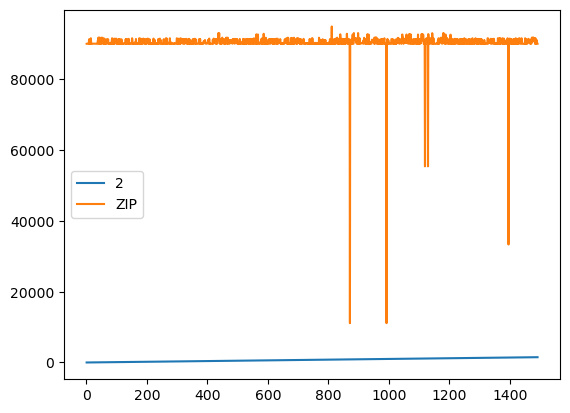

In [25]:
df.plot() # Let's see what this data will look like plotted.


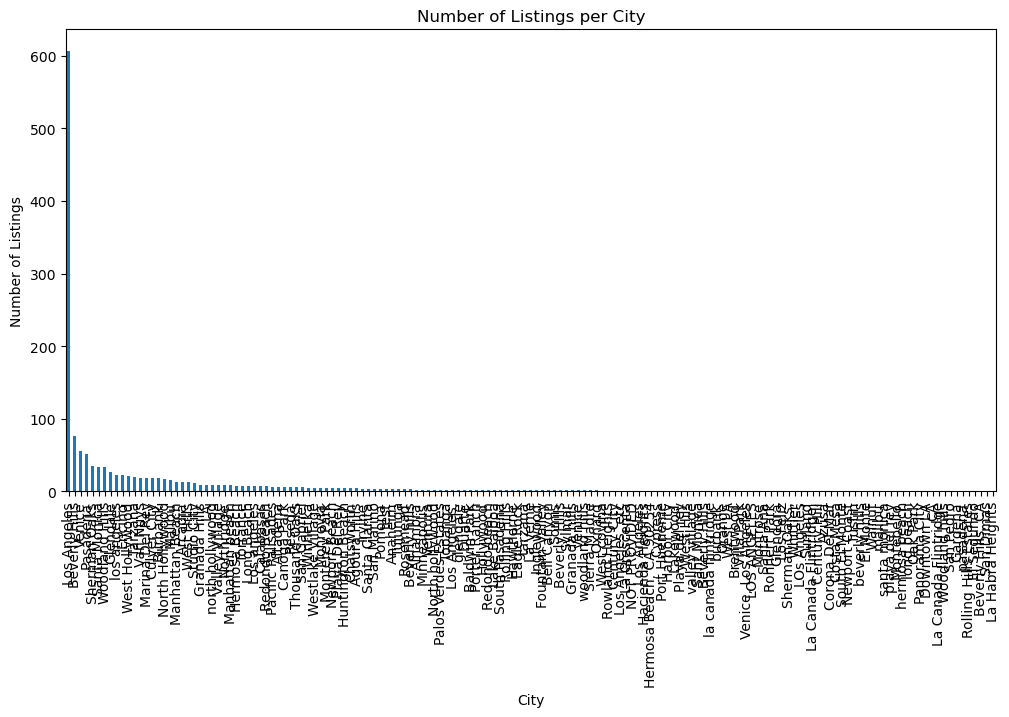

In [28]:
# Well that looks terrible and makes no sense. It looks like there's a column that just has numbers ascending. Let's make something nicer. 
# Let's see how many listings are in each city. 

import matplotlib.pyplot as plt

# Count the number of listings per city
city_counts = df["City"].value_counts()

# Plot the bar chart
city_counts.plot(kind="bar", figsize=(12,6), title="Number of Listings per City")

# Add labels
plt.xlabel("City")
plt.ylabel("Number of Listings")

# Show the plot
plt.show()

<Axes: xlabel='City'>

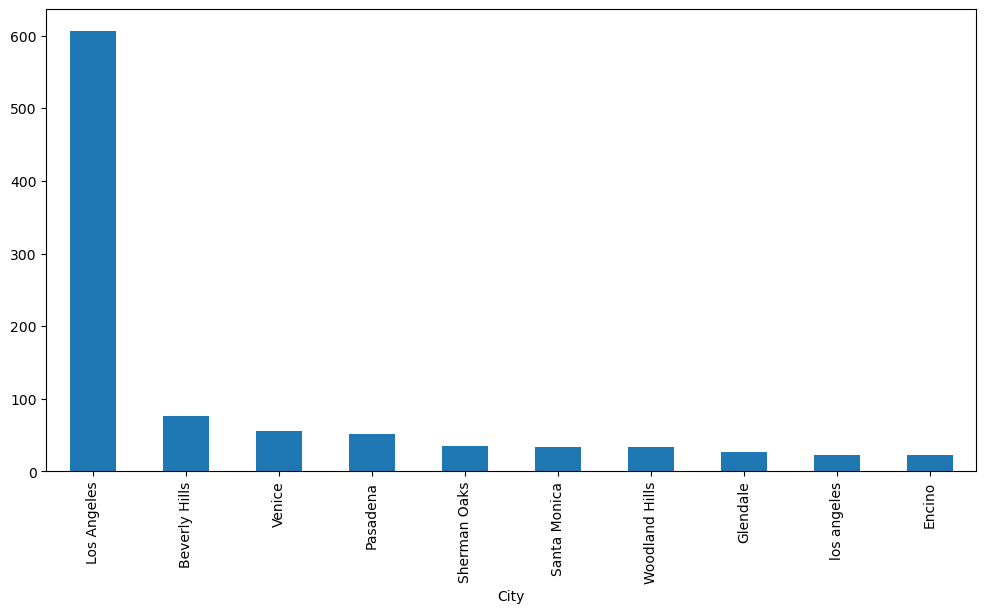

In [29]:
# Wow, that's a lot of cities. Let's just look at the top ten. 

city_counts.nlargest(10).plot(kind="bar", figsize=(12,6))

In [ ]:
# Much better. It looks like Los Angeles has far and away the most listings. It also looks like some listings just have "Los Angeles" for "City" whereas others have specific neighborhoods WITHIN Los Angeles listed for "City."

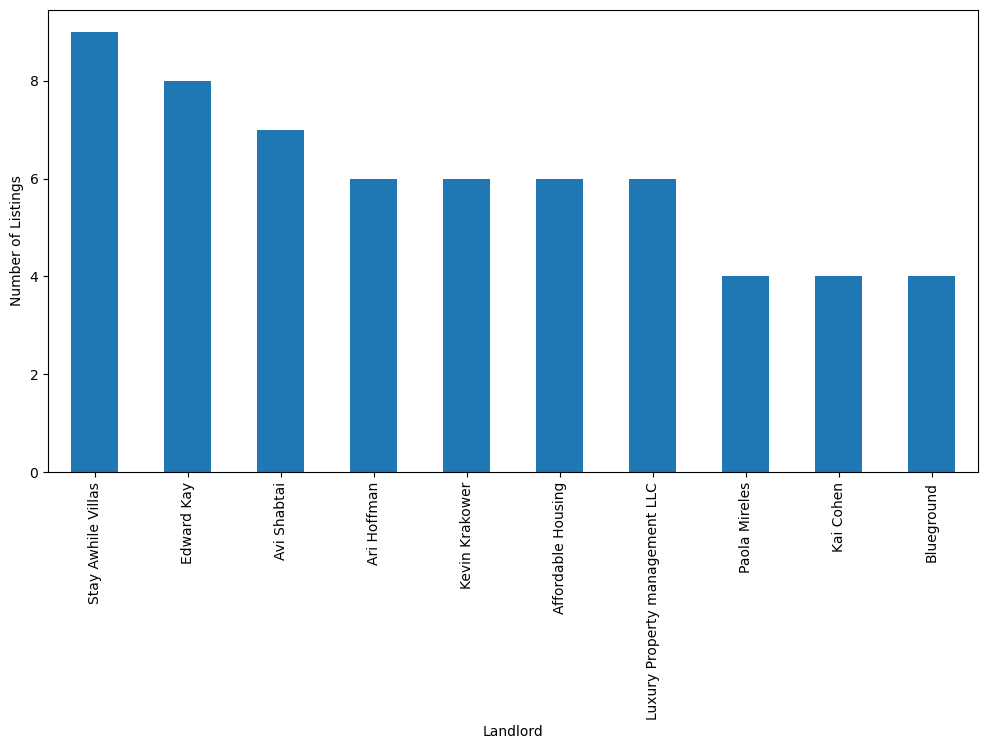

In [31]:
# I also want to see if there are any landlords that have been especially eager to price gouge. Let's make a bar chart with the top ten landlords listed in the sheet

# Count the number of listings per city
landlord_counts = df["Rental listing agent (if known)"].value_counts()

# Plot the bar chart
landlord_counts.nlargest(10).plot(kind="bar", figsize=(12,6))

# Add labels
plt.xlabel("Landlord")
plt.ylabel("Number of Listings")

# Show the plot
plt.show()

In [ ]:
# Looks like Stay Awhile Villas has been especially eager to price gouge... 

In [34]:
# Rental price increases over 10% are illegal. Let's see if there have been any particularly egregious cases of rent gouging over 20%.

# My rental price data is currently a string ($12,000 eg). I need to remove "$" and "," then convert to numeric

df["Rental price (per month) BEFORE the increase (put N/A if FMR)"] = df["Rental price (per month) BEFORE the increase (put N/A if FMR)"].replace('[\$,]', '', regex=True).astype(float)
df["Rental price (per month) AFTER the increase"] = df["Rental price (per month) AFTER the increase"].replace('[\$,]', '', regex=True).astype(float)


ValueError: could not convert string to float: '4550 was where it started in 2021 and now its 5670'

In [35]:
# It looks like there are some issues with the data. Some entries have text in them we'll need to clean up

# Extract the first numeric value in a string
def extract_numeric(value):
    import re
    match = re.search(r"\d{1,3}(?:,\d{3})*(?:\.\d+)?", str(value))  # Finds numbers with commas or decimals
    return float(match.group().replace(",", "")) if match else None  # Convert to float, remove commas

# Apply function to both rent columns
df["rent_before"] = df["Rental price (per month) BEFORE the increase (put N/A if FMR)"].apply(extract_numeric)
df["rent_after"] = df["Rental price (per month) AFTER the increase"].apply(extract_numeric)

# Check if conversion worked
print(df[["rent_before", "rent_after"]].head())


   rent_before  rent_after
0          NaN         NaN
1      12750.0     28000.0
2       5000.0      7000.0
3       8995.0     12000.0
4       9000.0     11000.0


In [39]:
# That looks pretty good. Now we can proceed with our filtering. 

df_high_rent_increase = df[df["rent_after"] > df["rent_before"] * 1.2]

print(df_high_rent_increase)


           2           Timestamp  \
1        3.0  1/11/2025 22:32:37   
2        4.0  1/11/2025 23:12:03   
3        5.0  1/11/2025 23:18:45   
4        6.0  1/11/2025 23:23:45   
5        7.0  1/11/2025 23:30:06   
...      ...                 ...   
1482  1484.0  1/31/2025 11:31:00   
1484  1486.0  1/31/2025 21:43:21   
1486  1488.0   2/1/2025 12:28:09   
1488  1490.0   2/2/2025 10:23:32   
1490  1492.0    2/3/2025 0:50:52   

     Address - House number, street, and apartment number          City State  \
1                                      1812 Navy Street    Santa Monica    CA   
2                                 11708 exposition blvd     Los Angeles    Ca   
3                                     716 Rochedale Way     Los Angeles    CA   
4                                    3512 Crestmont Ave     Los Angeles    CA   
5                                      8966 Shoreham Dr     Los Angeles    CA   
...                                                 ...             ...   ...   


In [ ]:
# Looks like there are plenty of instances of price gouging above 20%. It seems like this merits further investigation...